In [21]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [41]:
n = 30000

vec_alpha = np.array([0.1, 0.3, 0.7])
vec_alpha_label = np.array(['0.1', '0.3', '0.7'])

vec_Vk = np.linspace(-80, -50, n + 1)

df_V_distr = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_ad = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_wI = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_wI_ad = pd.DataFrame({'Vk':vec_Vk})

In [34]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha_val,
				EL_val = -60,
				EF_val = 0,
				ES_val = 0,
				EI_val = -80,
				nuF_val = 0.005,
				nuS_val = 0.005,
				nuI_val = 0.005,
				wF_val = 0.1,
				wS_val = 0.1,
				wI_val = 0.4,
				tauF_val = 1,
				tauS_val = 100,
				tauI_val = 10,
				KF_val = 400,
				KS_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)
	dV = (-50 + 80)/n
	P = FP_model.integrate_p0(vec_Vk)*nu

	df_V_distr[alpha_val] = P


0.1
0.3
0.7


In [35]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha_val,
				EL_val = -60,
				EF_val = 0,
				ES_val = 0,
				EI_val = -80,
				nuF_val = 0.005,
				nuS_val = 0.005,
				nuI_val = 0.005,
				wF_val = 0.1,
				wS_val = 0.1,
				wI_val = 0.4,
				tauF_val = 1,
				tauS_val = 100,
				tauI_val = 10,
				KF_val = 400,
				KS_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, False)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	P = FP_model.integrate_p0(vec_Vk)*nu
	df_V_distr_ad[alpha_val] = P


0.1
0.3
0.7


In [36]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha_val,
				EL_val = -60,
				EF_val = 0,
				ES_val = 0,
				EI_val = -80,
				nuF_val = 0.005,
				nuS_val = 0.005,
				nuI_val = 0.005,
				wF_val = 0.5,
				wS_val = 0.5,
				wI_val = 10.,
				tauF_val = 1,
				tauS_val = 100,
				tauI_val = 10,
				KF_val = 400,
				KS_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	P = FP_model.integrate_p0(vec_Vk)*nu
	df_V_distr_wI[alpha_val] = P

0.1
0.3
0.7


In [37]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha_val,
				EL_val = -60,
				EF_val = 0,
				ES_val = 0,
				EI_val = -80,
				nuF_val = 0.005,
				nuS_val = 0.005,
				nuI_val = 0.005,
				wF_val = 0.5,
				wS_val = 0.5,
				wI_val = 10.0,
				tauF_val = 1,
				tauS_val = 100,
				tauI_val = 10,
				KF_val = 400,
				KS_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, False)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	P = FP_model.integrate_p0(vec_Vk)*nu
	df_V_distr_wI_ad[alpha_val] = P

0.1
0.3
0.7


In [38]:
V_data_path = "../../Data/V_data/"
df_sim = pd.read_csv(f"{V_data_path}V_distr_Interpolated.dat")
df_sim_wI = pd.read_csv(f"{V_data_path}V_distr_interpolated_wI10.dat")

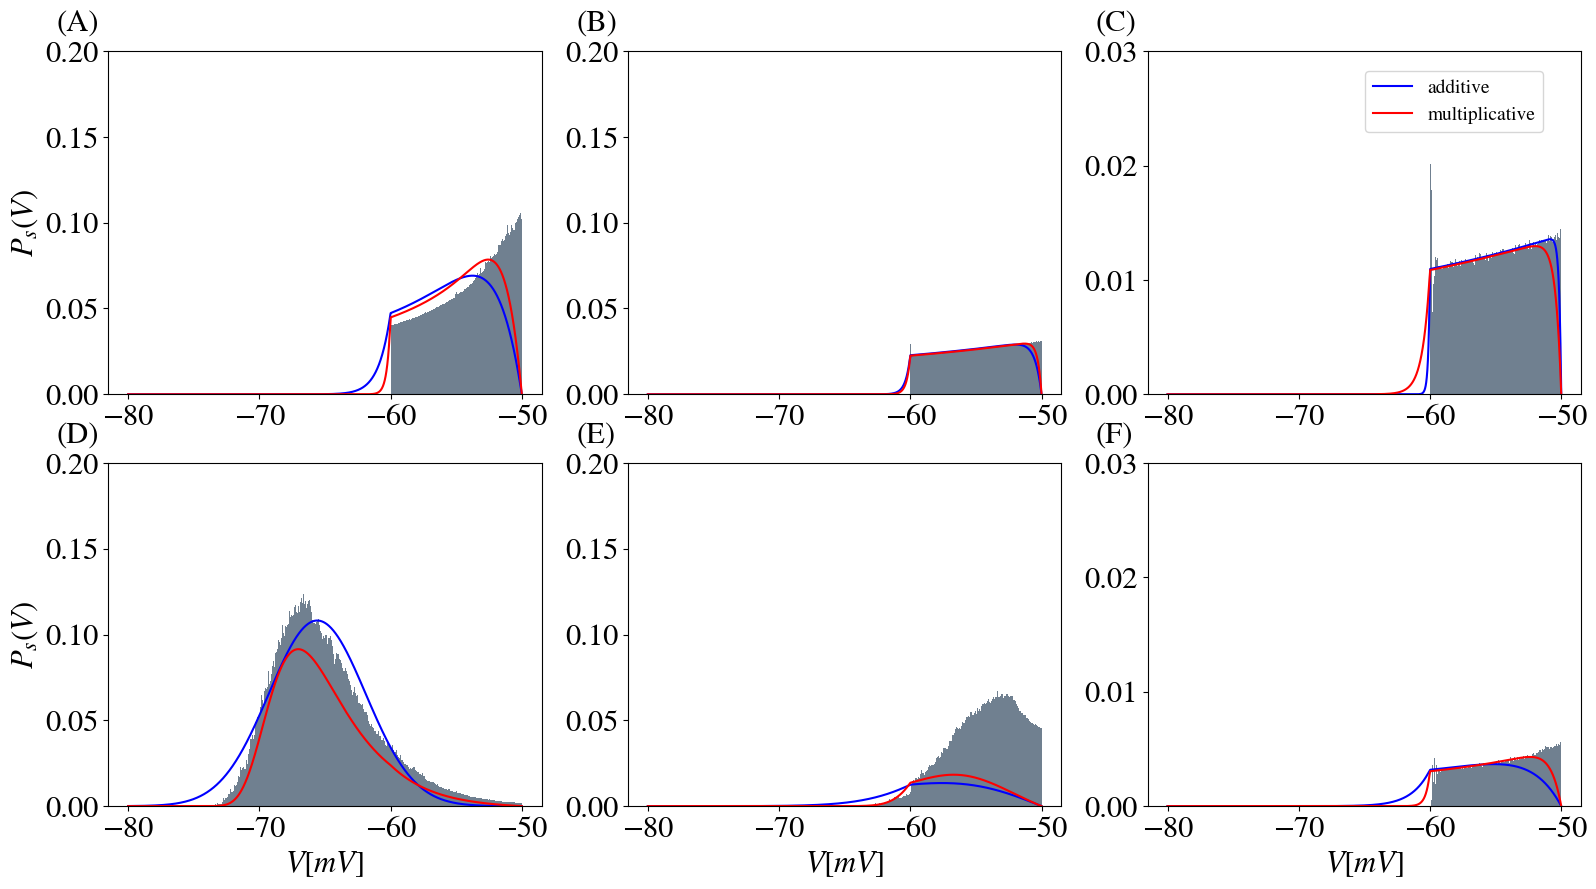

In [52]:
fig, axs = plt.subplots(2, 3, figsize=(19,10), dpi=100, squeeze=False)

axs[0][0].annotate("(A)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][2].annotate("(C)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][0].annotate("(D)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][1].annotate("(E)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][2].annotate("(F)", xy=(-0.12, 1.06), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$V[mV]$')
axs[1][1].set_xlabel(r'$V[mV]$')
axs[1][2].set_xlabel(r'$V[mV]$')
axs[0][0].set_ylabel(r'$P_s(V)$')
axs[1][0].set_ylabel(r'$P_s(V)$')
axs[0][0].set_ylim(0,0.2)
axs[0][1].set_ylim(0,0.2)
axs[0][2].set_ylim(0,0.03)
axs[1][0].set_ylim(0,0.2)
axs[1][1].set_ylim(0,0.2)
axs[1][2].set_ylim(0,0.03)

axs[0][0].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[0]], 'b-')
axs[0][0].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[0]], 'r-')
axs[0][0].hist(df_sim[vec_alpha_label[0]], bins=1000, density=True, color='slategray')

axs[0][1].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[1]], 'b-')
axs[0][1].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[1]], 'r-')
axs[0][1].hist(df_sim[vec_alpha_label[1]], bins=800, density=True, color='slategray')

axs[0][2].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[2]], 'b-', label='additive')
axs[0][2].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[2]], 'r-', label='multiplicative')
axs[0][2].hist(df_sim[vec_alpha_label[2]], bins=1000, density=True, color='slategray')

axs[1][0].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_alpha[0]], 'b-')
axs[1][0].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_alpha[0]], 'r-')
axs[1][0].hist(df_sim_wI[vec_alpha_label[0]], bins=1500, density=True, color='slategray')

axs[1][1].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_alpha[1]], 'b-')
axs[1][1].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_alpha[1]], 'r-')
axs[1][1].hist(df_sim_wI[vec_alpha_label[1]], bins=1000, density=True, color='slategray')

axs[1][2].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_alpha[2]], 'b-')
axs[1][2].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_alpha[2]], 'r-')
axs[1][2].hist(df_sim_wI[vec_alpha_label[2]], bins=500, density=True, color='slategray')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

In [30]:
df_sim

,Unnamed: 0,0.1,0.5,0.7
0,0,-60.000000,-58.229012,-60.0
1,1,-60.000000,-57.940066,-60.0
2,2,-60.000000,-57.652867,-60.0
3,3,-60.000000,-57.367403,-60.0
4,4,-60.000000,-57.083663,-60.0
...,...,...,...,...
1999995,1999995,-59.564581,-57.290964,-60.0
1999996,1999996,-59.521757,-57.029632,-60.0
1999997,1999997,-59.479060,-56.769991,-60.0
1999998,1999998,-59.436489,-56.512030,-60.0
